### Linear Regression Prediction

In [7]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression

from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

In [27]:
data = pd.read_excel('data/Data SW 3 Tahun.xlsx')
bulan = ['Januari','Februari','Maret','April',
         'Mei','Juni','Juli','Agustus',
         'September','Oktober','November','Desember'
        ]

In [31]:
data['HARI'] = '01'
data['date'] = data.apply(lambda row :
                          str(row['TAHUN'])+'-'+str(bulan.index(row['BULAN'])+1)+'-'+row['HARI'],axis=1)
data

,TAHUN,BULAN,KD,SW,DD,HARI,date
0,2017,Januari,575328000,9979027900,2209917000,01,2017-1-01
1,2017,Februari,569076000,9759141700,2209618000,01,2017-2-01
2,2017,Maret,580662000,10058572400,2142945000,01,2017-3-01
3,2017,April,501777000,8701330800,1919522000,01,2017-4-01
4,2017,Mei,639033000,10902165800,2585780000,01,2017-5-01
5,2017,Juni,639033000,10902165800,2585780000,01,2017-6-01
6,2017,Juli,708198000,11733674500,1659011750,01,2017-7-01
7,2017,Agustus,705111000,11807659700,1683043250,01,2017-8-01
8,2017,September,648702000,10992065600,1592544000,01,2017-9-01
9,2017,Oktober,722199000,12136387600,1152304500,01,2017-10-01


In [86]:
data['date'] = pd.to_datetime(data['date'])
new_data = pd.concat([data['date'],data['KD'],data['SW'],data['DD']],axis=1)
new_data.to_csv('data.csv',index=False,header=True)

In [87]:
df = pd.read_csv('data.csv')

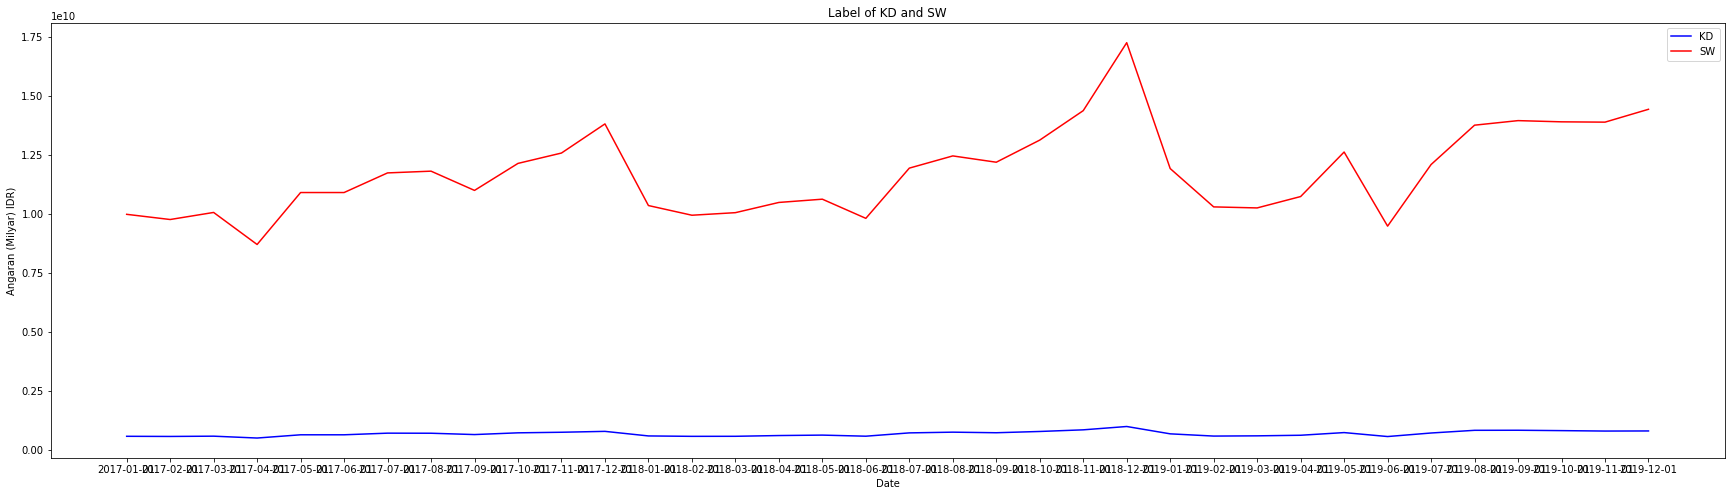

In [117]:
plt.figure(figsize=(30, 8))
plt.plot(df['date'], df['KD'], 'b-', label = 'KD')
plt.plot(df['date'], df['SW'], 'r-', label = 'SW')
plt.xlabel('Date'); plt.ylabel('Angaran (Milyar) IDR)'); plt.title('Label of KD and SW')
plt.legend();

In [173]:
df['date'] = pd.to_datetime(df['date'],errors="coerce")

In [221]:
X = df.iloc[:,0].values.reshape(-1,1)  # date column
y = df.iloc[:,1].values  # KD column
# y = y.reshape(-1,1)

In [222]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, random_state=20)  

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

TypeError: invalid type promotion

In [220]:
ypred,y_test

(array([[1.52443032e+18],
        [1.57851389e+18],
        [1.51435500e+18],
        [1.51366531e+18],
        [1.54097554e+18],
        [1.51697759e+18],
        [1.54608452e+18],
        [1.52144119e+18]]),
 array([['2017-05-01T00:00:00.000000000'],
        ['2018-12-01T00:00:00.000000000'],
        ['2018-02-01T00:00:00.000000000'],
        ['2017-02-01T00:00:00.000000000'],
        ['2017-11-01T00:00:00.000000000'],
        ['2018-01-01T00:00:00.000000000'],
        ['2018-10-01T00:00:00.000000000'],
        ['2019-04-01T00:00:00.000000000']], dtype='datetime64[ns]'))